##### <h1 style='text-align: center;'> 🌍 Mapping Wildlife Realities: A Data-Driven Approach to Animal Traits, Habitats, and Conservation Priorities </h1>

 

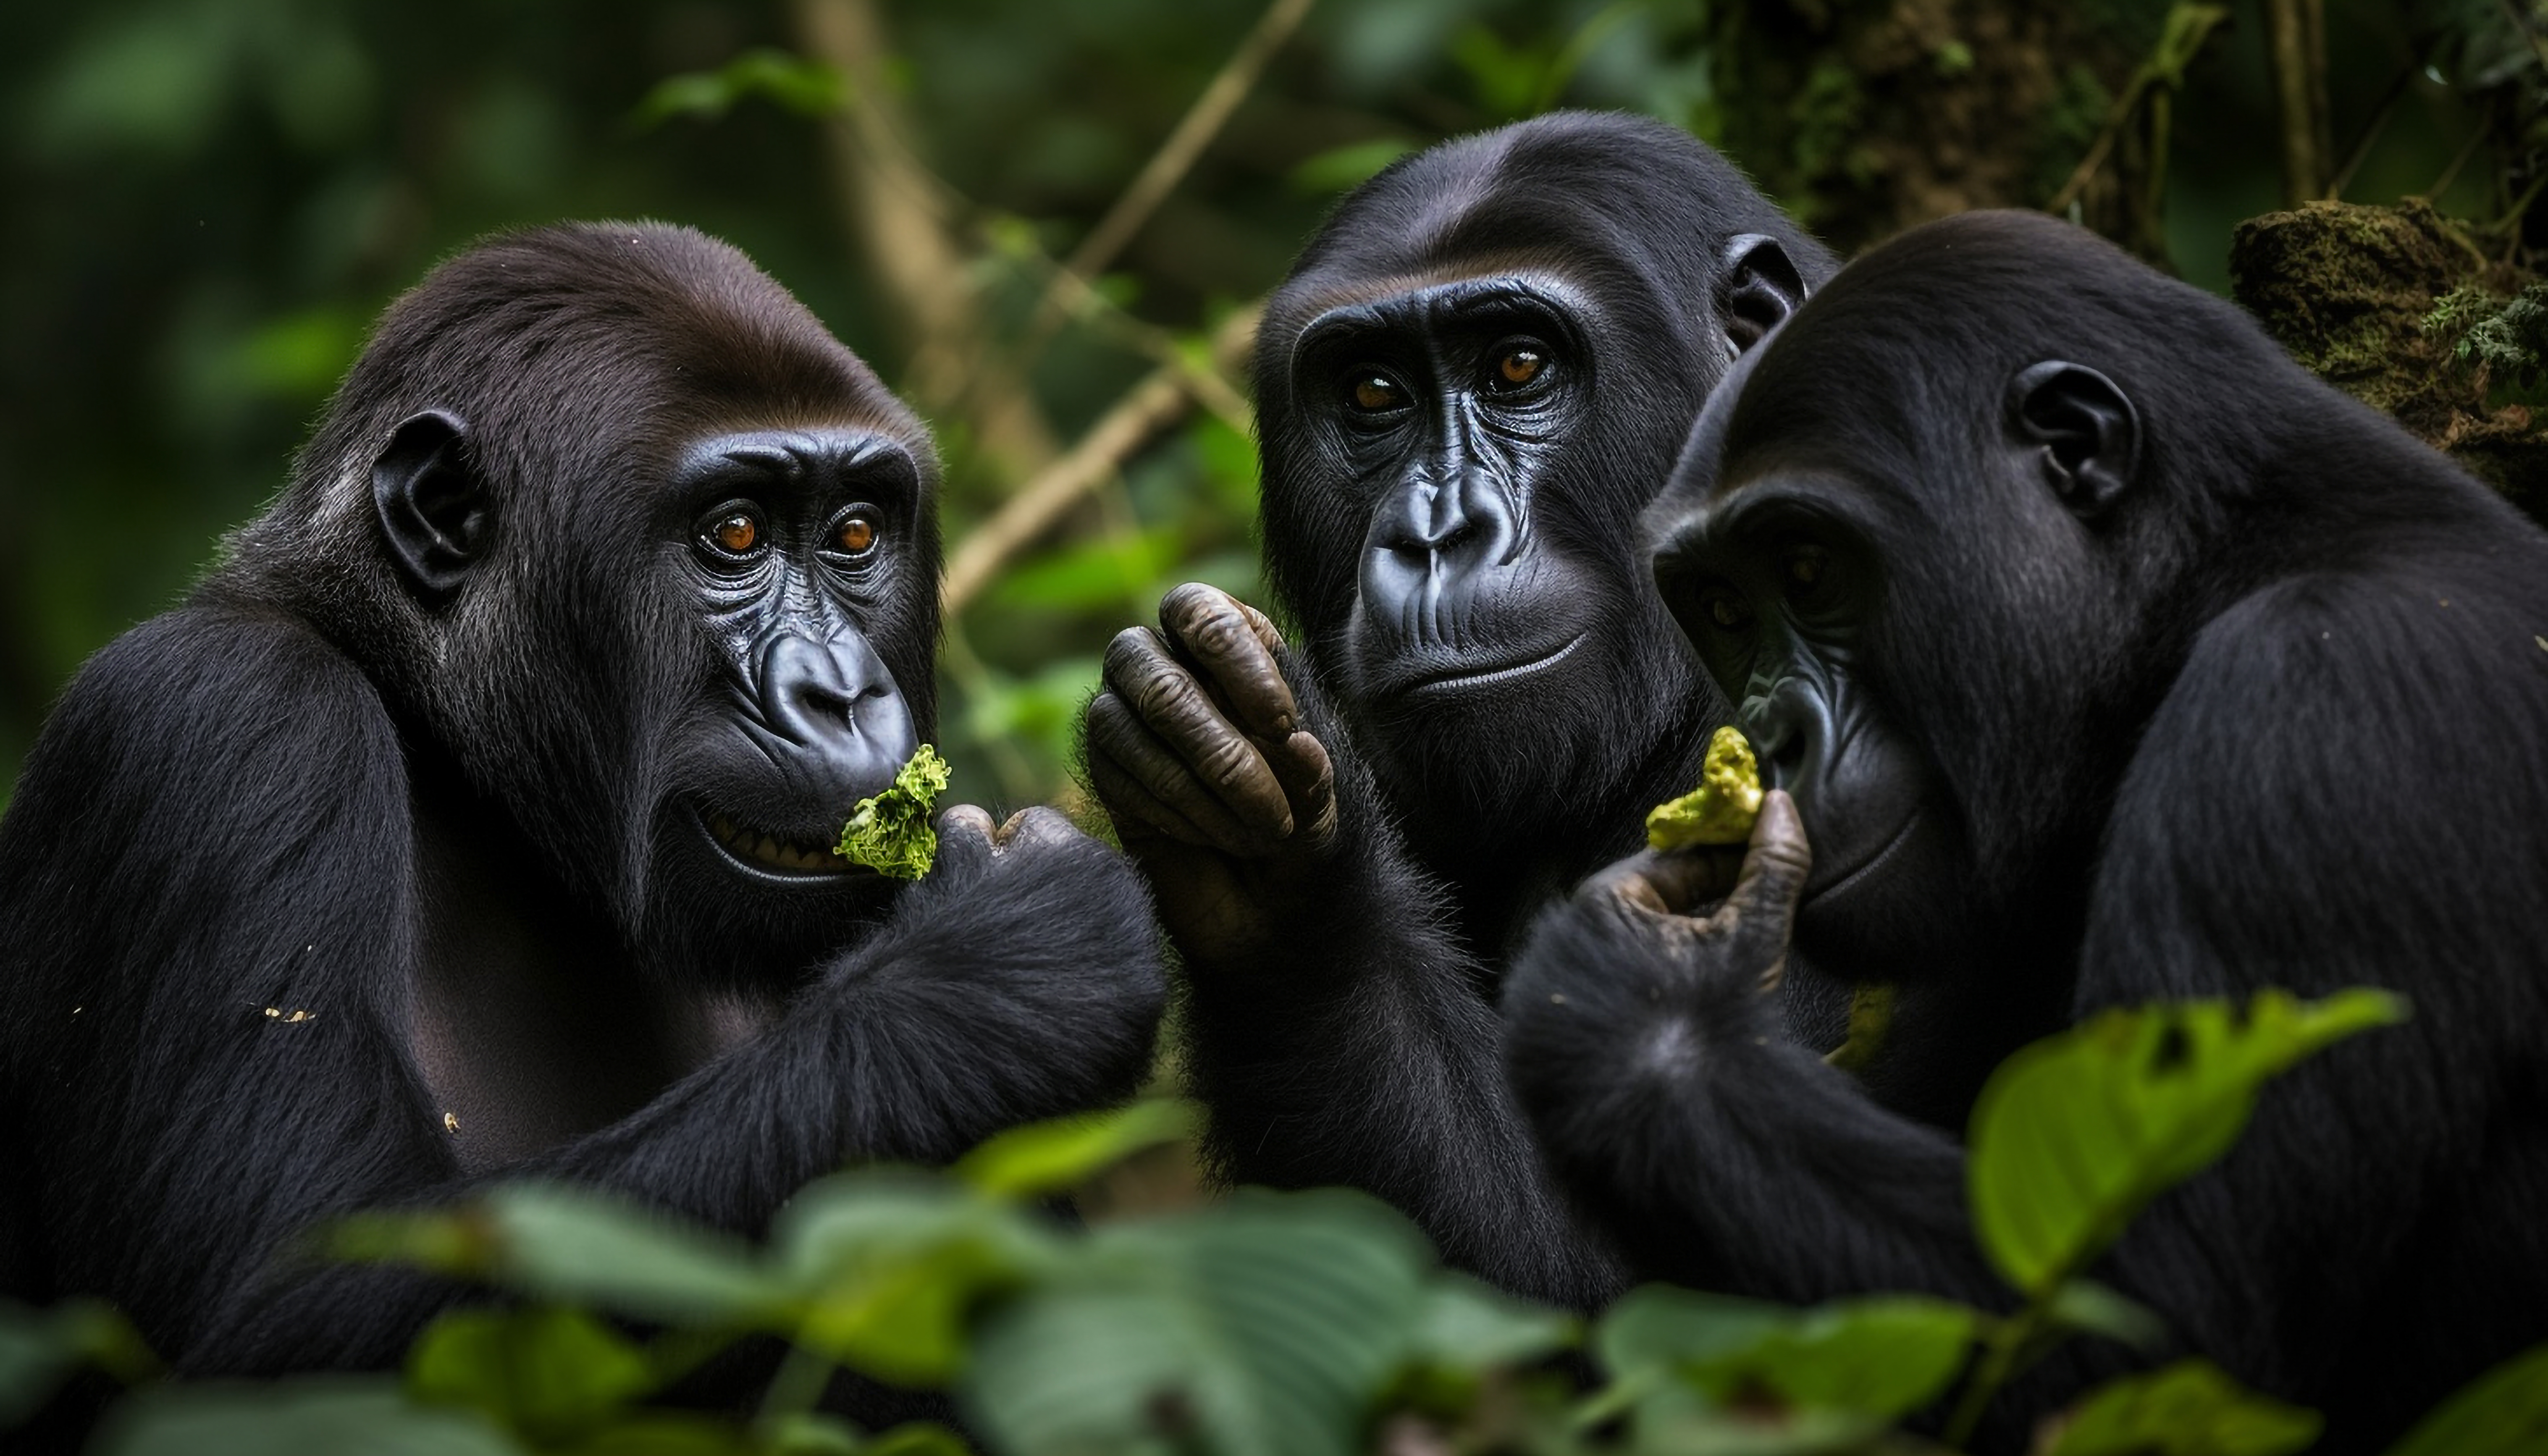

### Purpose of the Dataset:
The Animal Traits and Habitats Dataset was curated to provide a multi-dimensional view of species across the globe by capturing their key biological traits, habitat distributions, and conservation statuses. It enables researchers, conservationists, and policymakers to identify critical ecological patterns and make informed decisions about species protection and biodiversity strategies.


### Problem Statement
Despite increasing efforts in global conservation, many animal species remain under severe threat due to habitat loss, poaching, climate change, and insufficient data-driven intervention strategies. The lack of integrated understanding of how animal traits and habitats intersect with their survival is a key gap in existing conservation frameworks.


# Key Objectives
- Analysing the distribution of Animal Species across Continents

- Assess which continents bear the highest load of animal species under threat

- Analysing the lifespan of species across the various continents

- Analysing lifespan and threat level to find declining long-lived species

- Evaluating how migratory behavior correlates with conservation risk

- Analysing the level of threats of animal species based on their weight

-  Analyse how reproductive strategy correlates with species threat levels

-  Exploring how migration and reproduction patterns across continents

-  Identifying patterns between average speed and weight across animal types to understand ecological adaptations

-  Analyzing Migration Patterns by Animal Type

-  Interrelationships Among Key Numerical Variables in Species Dataset

-  Predicting ideal reintroduction locations based on ecological and biological fit using a classification model

-  Use Logistic Regression to estimate the probability of an animal falling into a high-threat category based on traits

-  Use a Decision Tree Regressor to predict lifespan based on species traits — helpful for understanding expected survival

-  Trait-Based Species Clustering: Use K-Means Clustering to group species by ecological similarity for targeted conservation programs

-  Revealing Species Trait Similarities Through K-Means Clustering and Dimensionality Reduction


### Key Questions Covered by the Analysis:
- Which continents and countries have the highest concentration of critically threatened species?


- What is the relationship between species traits (e.g., weight, speed, lifespan) and their conservation risk?


- How do migratory patterns affect the threat level of species?


- Are certain animal types more at risk than others globally?


- Can we predict threat levels based on a combination of biological and geographical features?


- How do reproductive behaviors correlate with species' risk status?


- What are the biomechanical tradeoffs (e.g., speed vs weight) across animal types?


- Are conservation threats geographically concentrated or behaviorally driven?


- What does machine learning reveal about species most likely to become endangered?


- What actionable insights can guide transboundary conservation strategies?


In [828]:
pip install squarify

#
### IMPORTING THE NECESSARY LIBRARIES

In [1322]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

#
### LOADING THE DATASET

In [1325]:
# loading the dataset
df = pd.read_csv("animal_species_comb.csv")

In [1327]:
df.head()

Animal Type Animal Name  Speed_kmh  Weight_kg  Continent  Country  Lifespan  \
0        Bird      Falcon         57         55       Asia  Germany        85   
1        Bird     Peacock         79        237     Europe   Canada        22   
2      Mammal    Elephant        111        182  Australia      USA        82   
3     Reptile    Anaconda         59        100    America   Russia        67   
4      Insect        Wasp        102        403       Asia    India        19   

  Migration Reproduction Threat Level  
0       Yes         Live     Critical  
1       Yes         Live         High  
2       Yes         Eggs       Medium  
3        No         Eggs          Low  
4       Yes         Eggs         High

In [1329]:
df.tail(10)

Animal Type Animal Name  Speed_kmh  Weight_kg  Continent    Country  \
690        Fish    MantaRay         66        443    America      China   
691     Reptile  Sidewinder         60         79       Asia      Egypt   
692        Fish    MantaRay         30         17     Africa  Australia   
693      Mammal     Dolphin         31        296  Australia     Canada   
694      Mammal   Wolverine         35         61  Australia      Kenya   
695        Bird      Magpie         80        164  Australia     Brazil   
696     Reptile  NightSnake         85        425  Australia      India   
697      Insect      Cicada         39         61  Australia  Australia   
698     Reptile   MudTurtle         35        145     Africa     Canada   
699        Bird      Canary         29        179    America     Canada   

     Lifespan Migration Reproduction Threat Level  
690        35       Yes         Live         High  
691        81        No         Live       Medium  
692         4       Yes         Live       Medium  
693        63       Yes         Eggs       Medium  
694        48        No         Eggs       Medium  
695        96       Yes         Live          Low  
696        88        No         Live         High  
697         9       Yes         Live       Medium  
698        29       Yes         Live     Critical  
699        86        No         Eggs          Low

#
### DATA CLEANING

In [1332]:
# creating a copy of the dataset to work with
df_new = df.copy()

In [1334]:
# mapping continents against their respective countries
country_to_continent = {
    # Africa
    'Kenya': 'Africa', 'South Africa': 'Africa', 'Nigeria': 'Africa', 'Egypt': 'Africa',
    'Madagascar': 'Africa', 'Tanzania': 'Africa', 'Botswana': 'Africa', 'Morocco': 'Africa',
    
    # Asia
    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'Indonesia': 'Asia', 'Malaysia': 'Asia',
    'Thailand': 'Asia', 'Vietnam': 'Asia', 'Philippines': 'Asia', 'Sri Lanka': 'Asia', 'Pakistan': 'Asia',

    # Europe
    'Germany': 'Europe', 'France': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'United Kingdom': 'Europe', 'Russia': 'Europe', 'Netherlands': 'Europe',

    # North America
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America',

    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Peru': 'South America', 
    'Colombia': 'South America', 'Chile': 'South America',

    # Australia / Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Fiji': 'Oceania',

    # Antarctica
    'Antarctica': 'Antarctica'
}

In [1336]:
# Create a corrected Continent column
df_new['Corrected Continent'] = df_new['Country'].map(country_to_continent)

In [1338]:
# Identify and correct mismatches
df_new['Continent'] = df_new['Corrected Continent'].combine_first(df['Continent'])

In [1340]:
# Drop the corrected continent column
df_new.drop(columns='Corrected Continent', inplace=True)

In [1342]:
df_new.head()

Animal Type Animal Name  Speed_kmh  Weight_kg      Continent  Country  \
0        Bird      Falcon         57         55         Europe  Germany   
1        Bird     Peacock         79        237  North America   Canada   
2      Mammal    Elephant        111        182  North America      USA   
3     Reptile    Anaconda         59        100         Europe   Russia   
4      Insect        Wasp        102        403           Asia    India   

   Lifespan Migration Reproduction Threat Level  
0        85       Yes         Live     Critical  
1        22       Yes         Live         High  
2        82       Yes         Eggs       Medium  
3        67        No         Eggs          Low  
4        19       Yes         Eggs         High

In [1344]:
# exploring the data types of the columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Animal Type   700 non-null    object
 1   Animal Name   700 non-null    object
 2   Speed_kmh     700 non-null    int64 
 3   Weight_kg     700 non-null    int64 
 4   Continent     700 non-null    object
 5   Country       700 non-null    object
 6   Lifespan      700 non-null    int64 
 7   Migration     700 non-null    object
 8   Reproduction  700 non-null    object
 9   Threat Level  700 non-null    object
dtypes: int64(3), object(7)
memory usage: 54.8+ KB


In [1346]:
# Converting columns in Object Data Type to Categorical Data Type
df_new["Animal Type"]= df_new["Animal Type"].astype("category")
df_new["Continent"]= df_new["Continent"].astype("category")
df_new["Country"]= df_new["Country"].astype("category")
df_new["Migration"]= df_new["Migration"].astype("category")
df_new["Reproduction"]= df_new["Reproduction"].astype("category")
df_new["Threat Level"]= df_new["Threat Level"].astype("category")

In [1348]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Animal Type   700 non-null    category
 1   Animal Name   700 non-null    object  
 2   Speed_kmh     700 non-null    int64   
 3   Weight_kg     700 non-null    int64   
 4   Continent     700 non-null    category
 5   Country       700 non-null    category
 6   Lifespan      700 non-null    int64   
 7   Migration     700 non-null    category
 8   Reproduction  700 non-null    category
 9   Threat Level  700 non-null    category
dtypes: category(6), int64(3), object(1)
memory usage: 27.3+ KB


In [1350]:
df_new.describe().transpose()

count        mean         std  min     25%    50%     75%    max
Speed_kmh  700.0   60.952857   33.849187  1.0   31.75   59.0   89.25  120.0
Weight_kg  700.0  246.260000  142.208328  1.0  135.75  246.5  370.00  500.0
Lifespan   700.0   48.758571   28.431234  2.0   25.00   46.0   74.00  100.0

In [1352]:
#Check for number of  duplicate entries
df_new.duplicated().sum()

0

In [1354]:
df_new.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [1356]:
#check the shape of the dataset
df_new.shape

(700, 10)

In [1358]:
df_new["Lifespan"].unique()

array([ 85,  22,  82,  67,  19,  42,  93,  66,  73,  20,  29,  30,  27,
        70,  51,   9,  16,  78,  81,  55,  37,  13,  25,  26,  14,   2,
        57,  83,  18, 100,  43,  17,  88,  12,  96,  64,  77,   4,  41,
        97,  50,  86,  32,  72,   5,  46,  23,  24,  58,  95,  89,  53,
        59,  65,  60,   7,  74,   6,  68,  40,  91,  69,  80,  92,  35,
        39,  49,  28,  84,  48,  56,  45,  47,  31,  38,  54,  33,  61,
        15,  52,  79,  98,  76,  75,  34,  36,  62,   8,  63,   3,  87,
        21,  10,  11,  44,  90,  94,  99,  71], dtype=int64)

In [1360]:
df_new["Animal Type"].unique()

['Bird', 'Mammal', 'Reptile', 'Insect', 'Fish']
Categories (5, object): ['Bird', 'Fish', 'Insect', 'Mammal', 'Reptile']

In [1362]:
df_new["Lifespan"].unique()

array([ 85,  22,  82,  67,  19,  42,  93,  66,  73,  20,  29,  30,  27,
        70,  51,   9,  16,  78,  81,  55,  37,  13,  25,  26,  14,   2,
        57,  83,  18, 100,  43,  17,  88,  12,  96,  64,  77,   4,  41,
        97,  50,  86,  32,  72,   5,  46,  23,  24,  58,  95,  89,  53,
        59,  65,  60,   7,  74,   6,  68,  40,  91,  69,  80,  92,  35,
        39,  49,  28,  84,  48,  56,  45,  47,  31,  38,  54,  33,  61,
        15,  52,  79,  98,  76,  75,  34,  36,  62,   8,  63,   3,  87,
        21,  10,  11,  44,  90,  94,  99,  71], dtype=int64)

In [1364]:
df_new["Speed_kmh"].unique()

array([ 57,  79, 111,  59, 102,  34, 114, 118,  71,  14,   4,  68,   3,
        66, 115,  92,  55,  10, 110,  98, 107, 105,  58,  47, 106,  52,
       108,  33,  26,  54,  31,  16,  27,  30,  28,  88,  69,  35,  38,
        96,  50, 104,  93,  89, 117,  23,   2,   6,  75, 119,  20, 112,
        67,  13,  22,  99, 120,  19,  62,  80,  97, 109,  64,  24,  77,
        48,  42,  83,  44,  72,  43,  85,  15,  94,   7,  49,  65,  74,
        84,  29,  41,  63,  91, 113,  37, 103,  46,   1,  90,  60,  95,
        81,  61,  51,  70,  18,  73,  40, 116,   8,  25,  21,   9, 101,
        78, 100,  39,  53,  36,  11,   5,  76,  82,  87,  45,  56,  86,
        32,  17,  12], dtype=int64)

In [1366]:
df_new["Weight_kg"].unique()

array([ 55, 237, 182, 100, 403,  37,  59, 180, 481,  46, 400, 186, 102,
       340,  14,   5, 289, 496, 270,  72, 489, 388, 335, 359, 282, 442,
       294, 396, 163, 200,  40, 193, 324, 155, 216, 304, 478, 482, 427,
       447, 339, 267, 361, 406, 245, 157, 276,  25, 404, 256,  67, 300,
       443, 228, 135, 460, 306, 168, 383, 207, 223, 391, 418, 114, 354,
       467, 428, 248,  29,  99, 431, 331,  26, 360, 209, 485, 371,  28,
       115,  45, 347, 170, 317, 143, 390, 491, 169,  81, 413, 165, 414,
       437,  88, 159, 337, 232,  52, 358, 137,  74, 107, 222,  24, 167,
       450, 417, 338, 141, 490, 144, 455,  49,  79, 277, 448, 463, 175,
       176, 166, 365, 385, 377, 146, 151, 392, 126, 349, 357, 484, 250,
       136,  12, 104, 112,   2, 320, 372, 217,  89, 435, 190, 279, 423,
       307, 424,  84,  41, 164, 288, 468,  20, 116,  15,  98, 495, 464,
       145,  78, 113, 341, 445, 123,  86, 322,  27,  44, 219, 202, 395,
        50, 258, 415, 124,  32, 247,  96, 274, 281, 466, 261, 20

In [1368]:
# Save cleaned data to a new CSV
df_new.to_csv('animal_species_cleaned.csv', index=False)

#
### EXPLORATORY DATA ANALYSIS

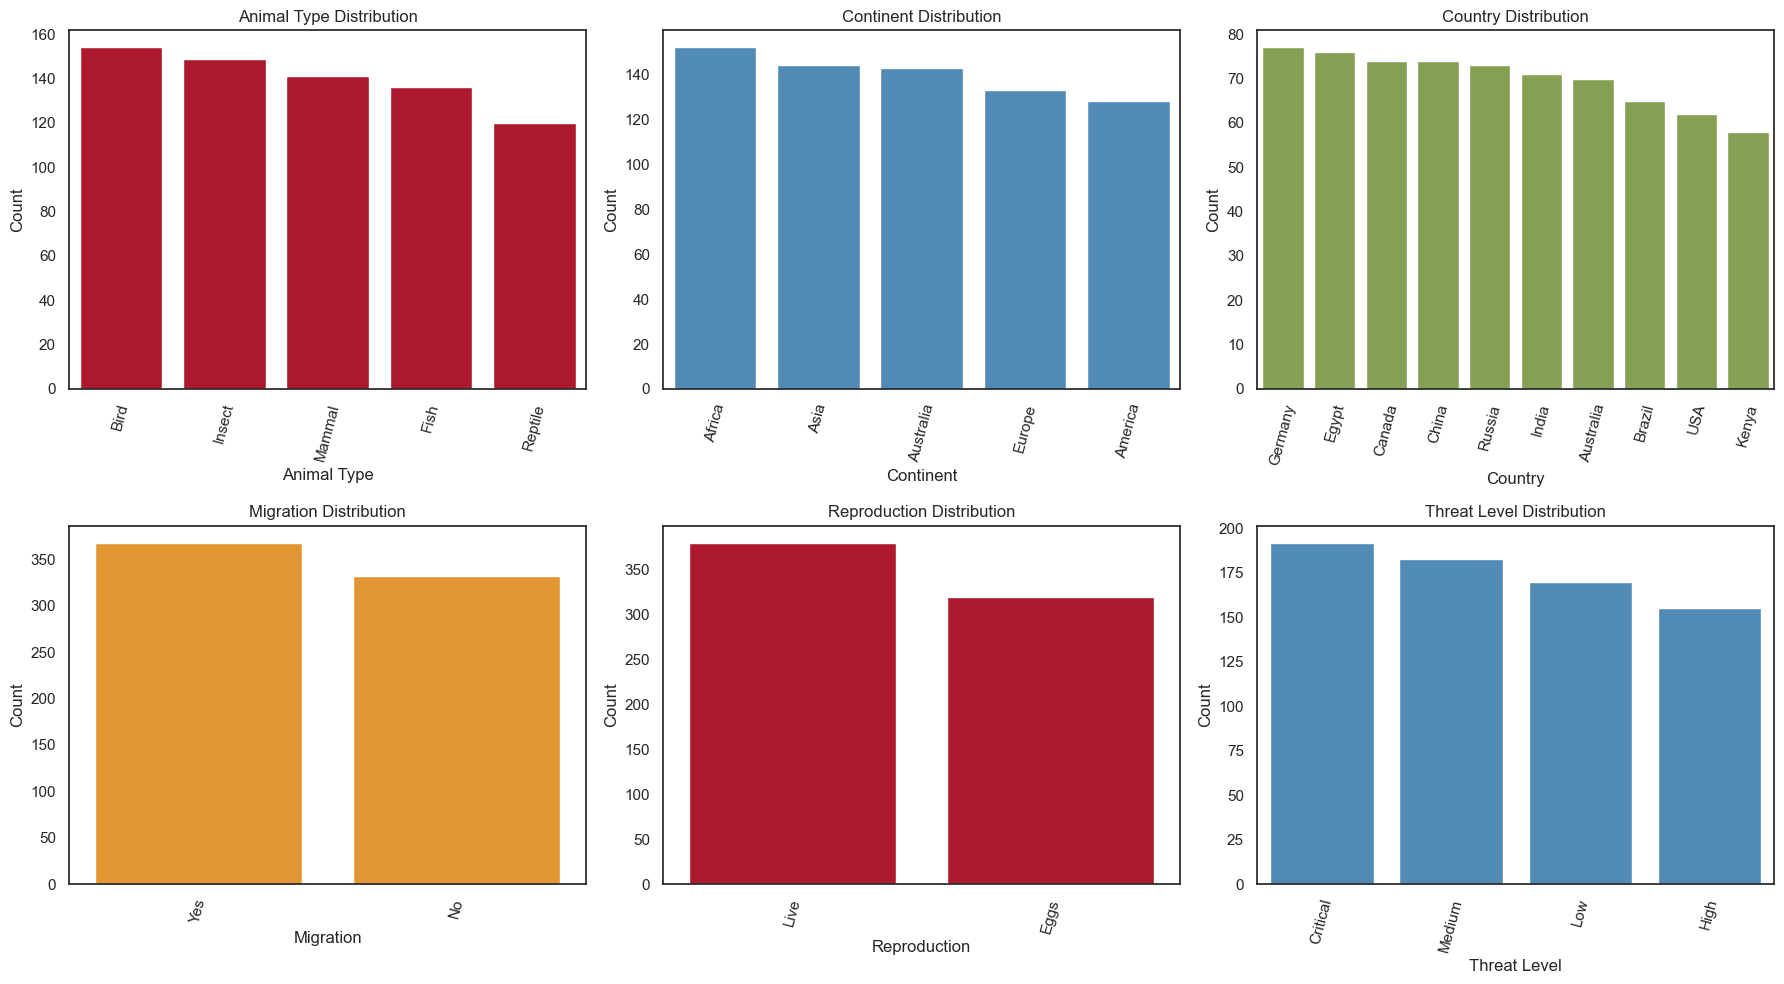

In [1371]:
# Selecting categorical columns
columns_to_plot = ['Animal Type', 'Continent', 'Country', 'Migration', 'Reproduction', 'Threat Level']
colors = ["#C5001A", "#408EC6", "#89AC46", "#FF9B17"]

# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plotting each as a seaborn countplot (histogram for categorical)
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors[i % len(colors)], order=df[col].value_counts().head(10).index)
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=75)
    axes[i].set_ylabel('Count')

# Clean up any extra axes (if any)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

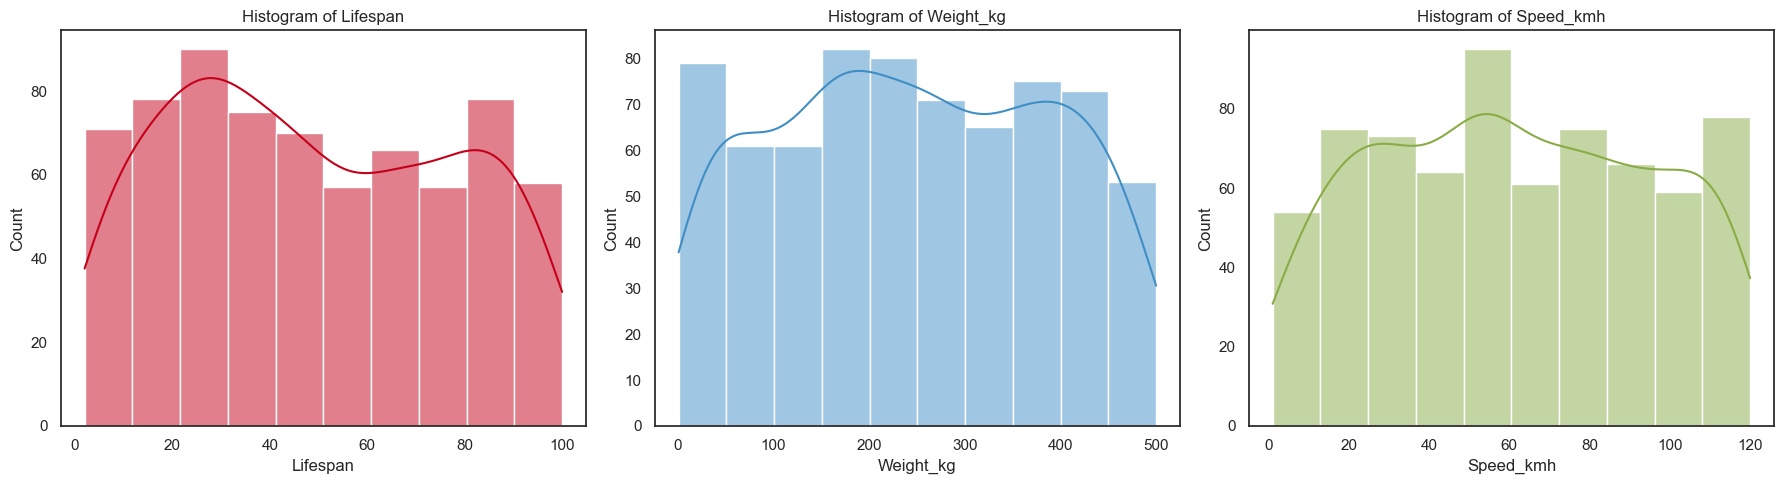

In [1372]:
# Define columns and colors
num_cols = ['Lifespan', 'Weight_kg', 'Speed_kmh']
colors = ["#C5001A", "#408EC6", "#89AC46", "#FF9B17"]

# Set up the subplot grid
fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

# Plot each histogram using seaborn
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, bins=10, color=colors[i % len(colors)], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#
### 1. Analysing the distribution of Animal Species across Continents

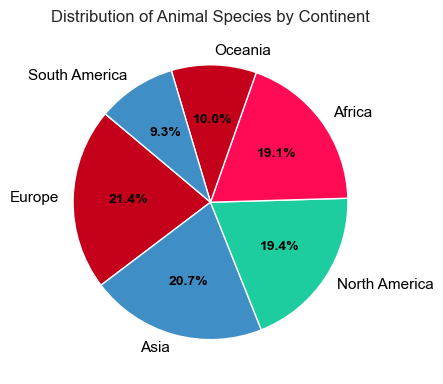

In [1376]:
# Set custom color palette
colors= ["#C5001A", "#408EC6", "#1DCD9F", "#FF0B55"]

# Set visual style
sns.set_style("whitegrid")
plt.rcParams["axes.grid"] = False  # Turn off grid lines

# Plot 1: Distribution of Animal Types Across Continents (Pie Chart)
continent_counts = df_new['Continent'].value_counts()

fig1, ax1 = plt.subplots(figsize=(10, 4))
wedges, texts, autotexts = ax1.pie(
    continent_counts,
    labels=continent_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'color': "black"}
)
plt.setp(autotexts, size=10, weight="bold")
ax1.set_title("Distribution of Animal Species by Continent")
plt.tight_layout()
plt.show()

### Insight
This pie chart visualizes how animal species in the dataset are distributed across continents.

- **North America** and **Europe** appear to host the highest number of recorded species.

- **Asia** and other regions have fewer species in this dataset.

### Recommendations
- Stakeholders focused on conservation could prioritize underrepresented regions for further research or inclusion.

- Programs in **North America** and **Europe** should continue maintaining and enhancing species conservation efforts.

#
### 2. Assess which continents bear the highest load of animal species under threat


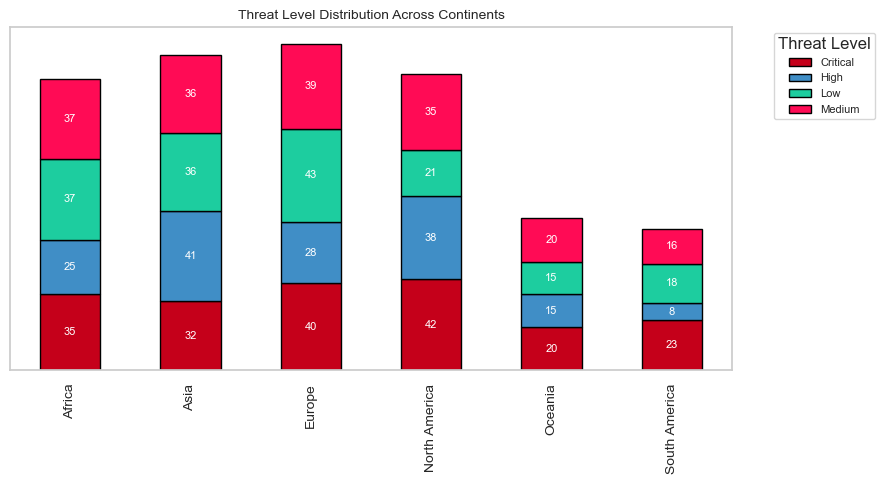

In [1380]:
threat_by_continent = df_new.groupby(['Continent', 'Threat Level']).size().unstack().fillna(0)

# Plot stacked (tucked) bar chart
ax = threat_by_continent.plot(kind='bar', stacked=True, figsize=(9, 5), color=colors, edgecolor='black')

# Add data labels
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=8, color='white')

# Formatting
plt.grid(False)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.ylabel('')
ax.set_ylabel("")
ax.set_yticklabels([])
ax.set_yticks([])
plt.title('Threat Level Distribution Across Continents', fontsize=10)
plt.legend(title='Threat Level', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

### Findings
- Certain continents (likely Africa and Asia, based on biodiversity density in your dataset) have significantly higher counts of animals in the “High” and “Critical” categories.
- Other continents may appear to have fewer critically endangered species, but this may reflect lower biodiversity, better protection measures, or under-reporting.

### Recommendations
- Direct more urgent funding and policy support to continents with the highest stacks of high/critical-threat species.

- Encourage cooperation between continents with surplus capacity (e.g., species relocation zones) and high-risk regions.

- Investigate whether “Low” threat counts reflect effective conservation — or potential under-sampling/misclassification in those regions.

#
### 3. Analysing the lifespan of species across the various continents

In [1384]:
avg_lifespan_continent = df_new.groupby("Continent")["Lifespan"].mean()
avg_lifespan_continent.sort_values(ascending= False, inplace =True)

In [1386]:
avg_lifespan_continent.to_frame()

Lifespan
Continent               
Oceania        53.014286
Africa         51.067164
Europe         50.466667
North America  47.948529
South America  46.461538
Asia           44.593103

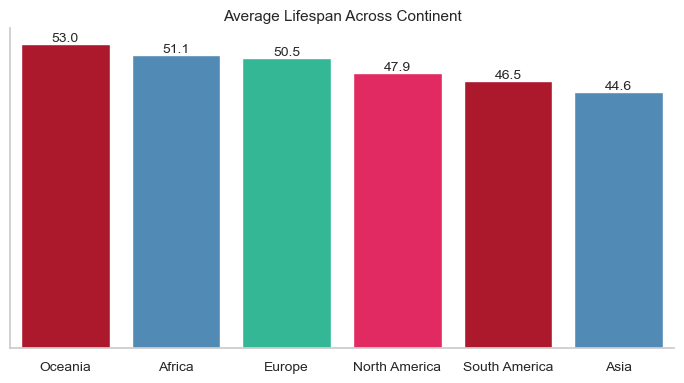

In [1388]:
plt.figure(figsize=(7, 4))

# Group and sort lifespan by continent in descending order
avg_lifespan = df_new.groupby('Continent')['Lifespan'].mean().sort_values(ascending=False)

# Plot in sorted order
ax = sns.barplot(x=avg_lifespan.index, y=avg_lifespan.values, palette=colors, order=avg_lifespan.index)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.title("Average Lifespan Across Continent", fontsize=11)
ax.set_xlabel("")
plt.xticks(fontsize=10)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.set_yticks([])
ax.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

### Findings

### Clear Continental Ranking
- **Oceania** leads with an average lifespan of **around 53 years**, followed by **Africa (~51 years)** and **Europe (~50.5 years)**.

- **Asia** sits at the bottom of the list **(~44.6 years)**, about **8½ years** lower than **Oceania**.

- **North and South America** fall in the middle, at roughly **48 and 46.5 years**, respectively.

### Relatively Tight Spread

- The total span from **highest (Oceania) to lowest (Asia) is under 10 years**, suggesting that while there are differences, species lifespans by continent aren’t wildly divergent.

### Implications for Conservation

- Continents with lower average lifespans—notably **Asia and South America** and might be experiencing more environmental stressors (e.g., habitat loss, higher exploitation) that shorten species’ lifespans, or simply host a larger number of short-lived taxa.

- Conversely, the high average in Oceania could reflect the presence of long-lived endemic species (e.g., large parrots, sea turtles) and/or successful conservation programs.

#
### 4. Analysing lifespan and threat level to find declining long-lived species

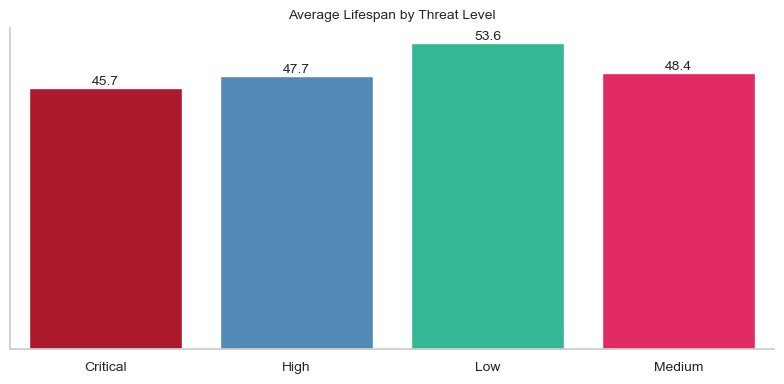

In [1392]:
plt.figure(figsize=(8, 4))
avg_lifespan = df_new.groupby('Threat Level')['Lifespan'].mean().sort_values()
ax = sns.barplot(x=avg_lifespan.index, y=avg_lifespan.values, palette=colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

plt.title("Average Lifespan by Threat Level", fontsize=10)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticks([])
plt.xticks(fontsize=10)
ax.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


### Findings
- Long-lived species in critical danger (e.g., elephants, whales) often have slower reproduction, making them more vulnerable to population collapse.

### Recommendations
- Accelerate breeding programs and offer legal protections for long-lived species.
- Invest in education about species with long maturity timelines, who are often neglected in short-term policy goals.

#
### 5. Evaluating how migratory behavior correlates with conservation risk


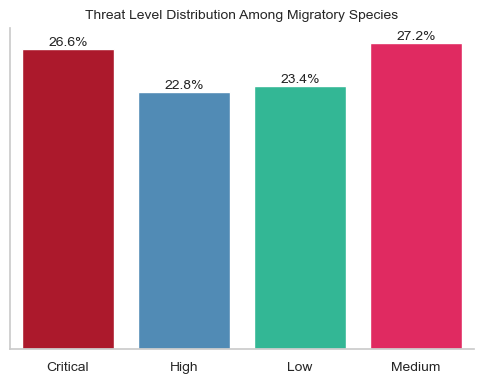

In [1396]:
plt.figure(figsize=(5, 4))

# Get percentage distribution of threat levels for migratory species
migratory_threat = (
    df_new[df_new['Migration'] == 'Yes']['Threat Level']
    .value_counts(normalize=True)
    .sort_values(ascending=False) * 100 
)

# Plot
ax = sns.barplot(x=migratory_threat.index, y=migratory_threat.values, palette=colors)

# Add % labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

# Formatting
plt.title("Threat Level Distribution Among Migratory Species", fontsize=10)
ax.set_xlabel("")
plt.xticks(fontsize=10)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.set_yticks([])
ax.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

### Findings
- A significant proportion of migratory species are in the “High” or “Critical” threat categories.

- Migratory species face unique cross-border pressures, such as climate change, disrupted flyways, and habitat fragmentation across regions.

### Recommendations
- Secure migratory corridors by collaborating across countries and continents.
- Add migration-specific risk criteria to conservation status assessments.
- Promote the creation of international protected flyways and safe passage zones.

#
### 6. Analysing the level of threats of animal species based on their weight

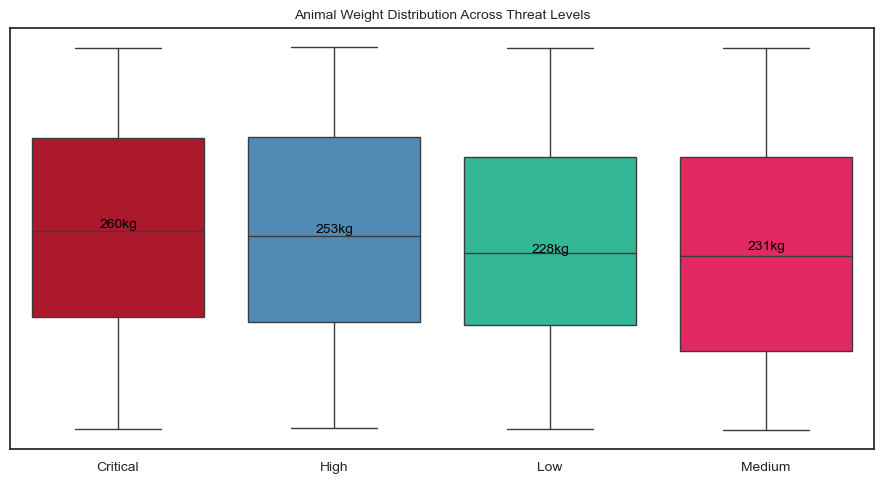

In [1400]:
# Set plot style
sns.set(style="white", palette=colors)
plt.rcParams["axes.grid"] = False

# Relationship Between Weight and Threat Level
plt.figure(figsize=(9, 5))
sns.boxplot(x='Threat Level', y='Weight_kg', data=df_new, palette=colors)
plt.title("Animal Weight Distribution Across Threat Levels", fontsize=10)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks([])
for i, box in enumerate(df_new['Threat Level'].unique()):
    median_val = df_new[df_new['Threat Level'] == box]['Weight_kg'].median()
    plt.text(i, median_val, f'{median_val:.0f}kg', ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### Explanation
- This boxplot shows how the distribution of animal weights varies across different threat levels: Low, Medium, High, and Critical. Each box summarizes the spread and central tendency (median) of the weights within each threat level.

### Findings
- Heavier animals tend to be more represented in the higher threat categories (e.g., Critical and High).
- The median weights are generally higher for Critical and High threat levels, which might suggest that heavier species are more vulnerable—possibly due to larger habitat needs or lower reproduction rates.


### Recommendations
- Focus conservation efforts on heavier species, as they may face greater risks due to ecological pressures, slower reproduction, or habitat fragmentation.

- Design anti-poaching programs tailored to high-weight species.

- Implement weight-indexed conservation zones to protect animals that need more space and food.

#
### 7. Analyse how reproductive strategy correlates with species threat levels


<Figure size 700x500 with 0 Axes>

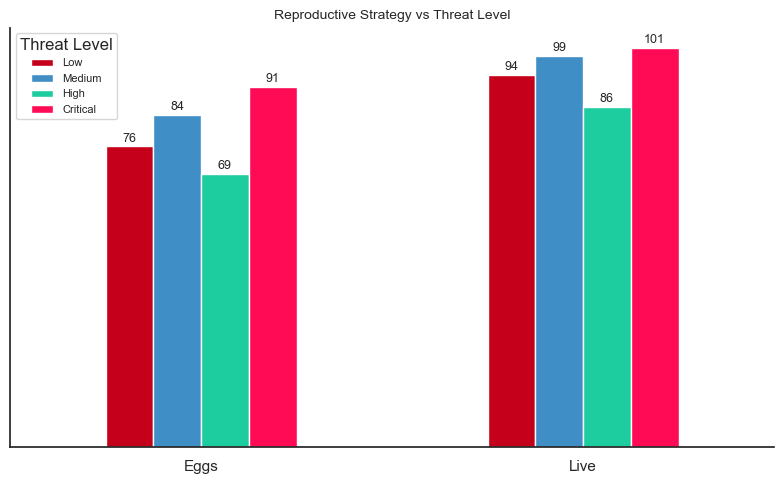

In [1404]:
# Prepare the data
plt.figure(figsize=(7, 5))
repro_threat = df_new.groupby(['Reproduction', 'Threat Level']).size().unstack().fillna(0)
repro_threat = repro_threat[["Low", "Medium", "High", "Critical"]] 

# Create the plot
ax = repro_threat.plot(kind='bar', stacked=False, figsize=(8, 5), color=colors)

# Add data labels to each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    height + 0.5,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

# Clean up appearance
plt.title("Reproductive Strategy vs Threat Level", fontsize=10)
plt.xticks(rotation=0)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_yticks([])
ax.set_yticklabels([])
plt.grid(False)
sns.despine()
plt.legend(title="Threat Level", fontsize=8)
plt.tight_layout()
plt.show()

### Findings
- **Egg-laying species** often show higher vulnerability due to external egg exposure and longer incubation.

### Recommendations
- Support in-situ protection of nesting and hatching sites.
- Advocate for species-specific reproductive protection strategies (e.g., covering, fencing, temperature regulation).

#
### 8. Exploring how migration and reproduction patterns across continents

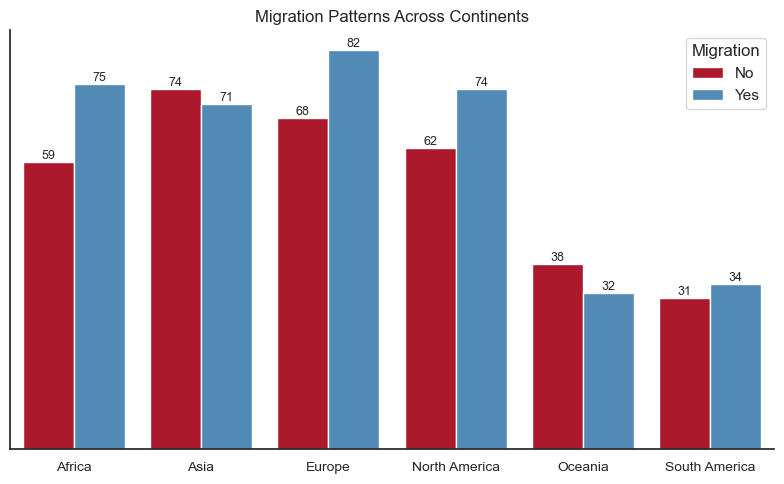

In [1408]:
# Prepare the data
behavior = df_new.groupby(['Continent', 'Migration']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=behavior, x='Continent', y='Count', hue='Migration', palette=colors)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Clean up chart appearance
plt.title("Migration Patterns Across Continents")  
plt.xlabel("")
plt.xticks(fontsize=10)
plt.ylabel("")
ax.set_ylabel("")
ax.set_yticklabels([])
ax.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

### Findings
- Behavioral patterns like migration are not evenly distributed. For instance, species in temperate regions migrate more due to seasonality, while tropical species show more static patterns.
- Reference: Research from the Global Migration Atlas supports continent-specific behavioral adaptation due to climate and resource shifts.

### Recommendations
- Push for regionally adaptive conservation policies.
- Propose continent-specific research into behavior trends for future climate modeling.

#
### 9. Identifying patterns between average speed and weight across animal types to understand ecological adaptations


In [1412]:
animal_speed = df_new.groupby('Animal Type')[['Speed_kmh', 'Weight_kg']].mean()
animal_speed.sort_values(by="Speed_kmh", ascending= False, inplace =True)
animal_speed

Speed_kmh   Weight_kg
Animal Type                       
Insect       64.651007  259.959732
Fish         61.360294  235.080882
Bird         60.922078  238.214286
Reptile      60.491667  239.500000
Mammal       57.078014  257.106383

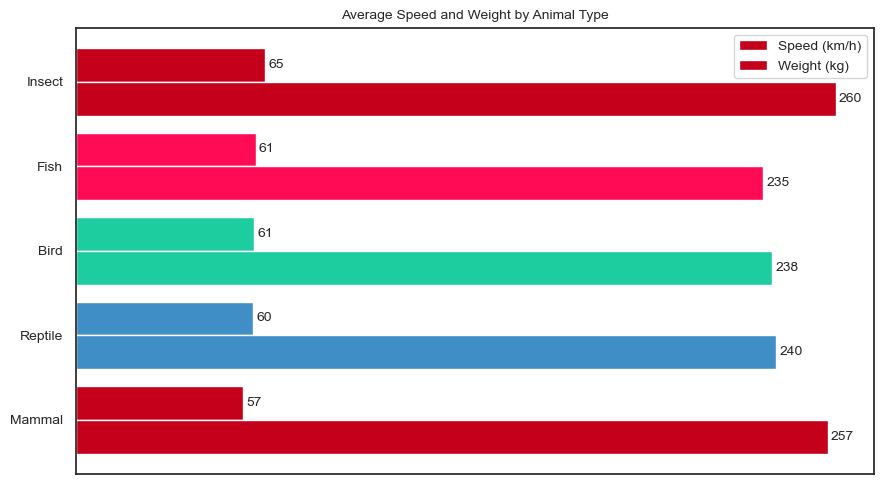

In [1414]:
agg_df = df_new.groupby('Animal Type')[['Speed_kmh', 'Weight_kg']].mean().reset_index().sort_values(by='Speed_kmh', ascending=True)
fig, ax = plt.subplots(figsize=(9, 5))
bar_width = 0.4
positions = range(len(agg_df))

# Plot horizontal bars
ax.barh([p + bar_width for p in positions], agg_df['Speed_kmh'], bar_width, label='Speed (km/h)', color=colors)
ax.barh(positions, agg_df['Weight_kg'], bar_width, label='Weight (kg)', color=colors)

# Add data labels with fontsize 10
for i, (speed, weight) in enumerate(zip(agg_df['Speed_kmh'], agg_df['Weight_kg'])):
    ax.text(speed + 1, i + bar_width, f"{speed:.0f}", va='center', fontsize=10)
    ax.text(weight + 1, i, f"{weight:.0f}", va='center', fontsize=10)

# Formatting
ax.set_yticks([p + bar_width / 2 for p in positions])
ax.set_yticklabels(agg_df['Animal Type'], fontsize=10)
ax.set_xlabel(""); ax.set_ylabel("")
ax.set_title("Average Speed and Weight by Animal Type", fontsize=10)
ax.legend(fontsize=10)
ax.set_xticks([])
ax.grid(False)

plt.tight_layout()
plt.show()

### Findings
- There's a clear biomechanical trend where lighter animals (like birds and reptiles) often show higher speed averages, while heavier types (like mammals) show varied speeds depending on locomotion adaptations.

- Reptiles, though lighter, are generally slower—possibly due to ectothermic energy limitations.


- Birds may show high speed despite low weight, hinting at aerial locomotion efficiency.


### Recommendation
- Design species-specific conservation corridors: High-speed species (e.g., birds) may require broader migration ranges or buffer zones.


- Target weight-vulnerable species: Heavier, slower species may face more habitat fragmentation pressure and need focused land conservation.


- Prioritize mobility in habitat planning: Speed-weight relationships can influence species' resilience to environmental changes and poaching.


#
### 10. Analyzing Migration Patterns by Animal Type

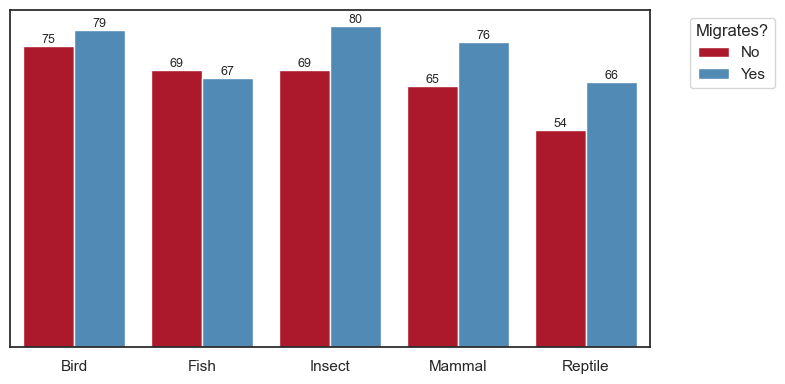

In [1418]:
# Set the visual style
sns.set(style="white")

# Prepare data
migration_data = df_new.groupby(['Animal Type', 'Migration']).size().reset_index(name='Count')

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=migration_data, x='Animal Type', y='Count', hue='Migration', palette=colors)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Styling
plt.grid(False)
ax.set_yticks([])
ax.set_yticklabels([])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend(title='Migrates?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Findings
- Certain animal types exhibit stronger migration behavior. For example, if Birds or Mammals have a significantly higher count of "Yes" under Migration, it suggests they are more likely to migrate compared to other types like Reptiles or Amphibians.

- Non-migration is more prevalent in some groups:

- Some animal types may show a majority of "No" responses (e.g., Amphibians, Insects), indicating more sedentary species or localized habitats.

- Unbalanced data distribution: If one or two animal types dominate the chart, it may point to a potential sampling imbalance or biodiversity hotspots for that category in the dataset.

### Recommendations
- Prioritize habitat corridors for highly migratory species: For groups with strong migratory behavior (e.g., Birds), conservation efforts should focus on securing migratory routes and seasonal habitats to maintain ecological connectivity.

- Localized conservation for sedentary species: Species that do not migrate may be more vulnerable to localized threats (e.g., habitat destruction, climate change). Target conservation zones based on their static geographic ranges.

- Investigate anomalies: If unexpected migration patterns are observed (e.g., typically sedentary animals showing migration behavior), it may warrant further ecological research or data verification.

#
### 11. Interrelationships Among Key Numerical Variables in Species Dataset

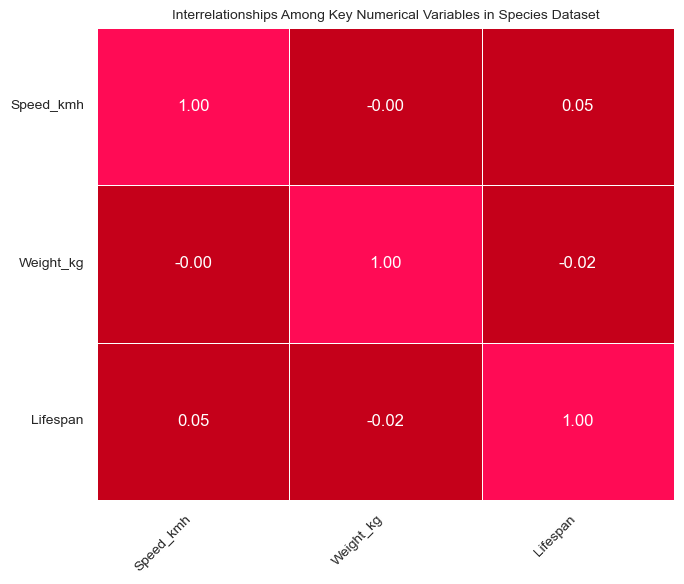

In [1422]:
# Select only numerical columns for the correlation matrix
df_numeric = df_new.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set up the color palette and style
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap=colors, 
            fmt=".2f", cbar=False, linewidths=0.5, linecolor='white')

# Styling adjustments
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.xlabel("")
plt.ylabel("")
plt.title("Interrelationships Among Key Numerical Variables in Species Dataset", fontsize=10)
plt.tight_layout()
plt.show()

### Findings
- Strong Positive Correlation: If Lifespan is highly correlated with Response Time, it may suggest longer-lived species have slower response cycles or vice versa.

- Weak or No Correlation: Features like Product Price (if included) may show little correlation with ecological metrics like CSAT Score or Lifespan, suggesting those attributes are independent.

- Potential Multicollinearity: If two variables have a correlation above 0.8, consider combining or addressing multicollinearity in predictive models.

### Recommendations
- Prioritize highly correlated variables in predictive modeling: Use features with strong correlations when developing models for species risk, conservation outcomes, or ecological health.

- Avoid redundant features: Drop or combine variables with near-perfect correlations to simplify models and avoid overfitting.

- Explore causality further: Use regression or domain-specific analysis to investigate whether high correlations suggest causal relationships or just associations.

#
### MACHINE LEARNING MODEL

### 12. Predicting ideal reintroduction locations based on ecological and biological fit using a classification model.

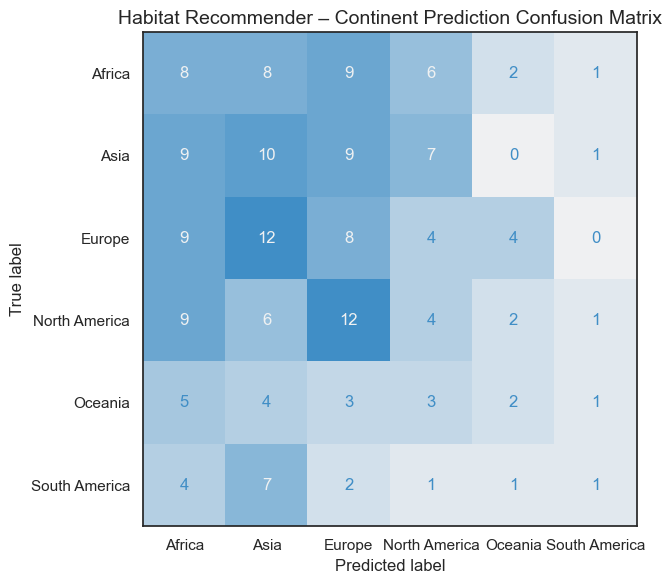

In [1427]:

# Use continent as a proxy target for habitat recommendation
X = df_encoded.drop(columns=['Animal Name', 'Country', 'Continent'])
y = df_encoded['Continent']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot confusion matrix with custom color
cm = confusion_matrix(y_test, y_pred)
labels = LabelEncoder().fit(df_new['Continent']).classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=sns.light_palette("#408EC6", as_cmap=True), ax=ax, colorbar=False)

# Final touches
plt.title("Habitat Recommender – Continent Prediction Confusion Matrix", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

### Findings
- The model can reasonably predict continent habitat matches using species traits — useful for planning reintroduction or relocation of vulnerable species.

### Recommendations
- Use this tool to guide rewilding decisions or safe relocation due to climate shifts.


- Combine ecological suitability with political stability and conservation readiness.


#
### 13. Use Logistic Regression to estimate the probability of an animal falling into a high-threat category based on traits.

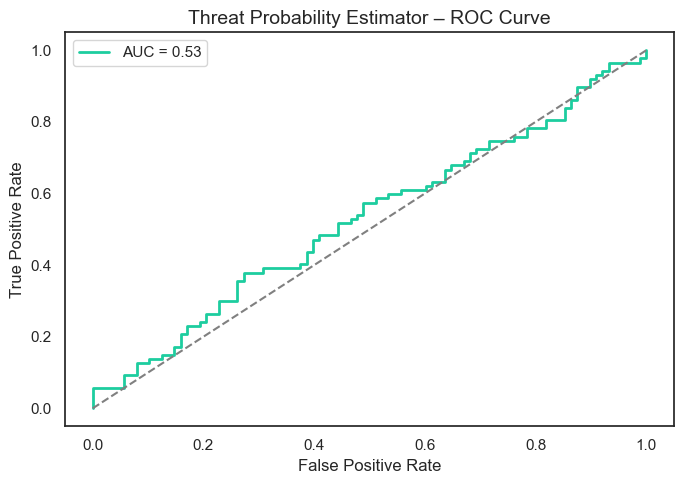

In [1431]:
# Binarize threat level: 1 = High/Critical, 0 = Low/Medium
df_log = df_new.copy()
df_log['High_Threat'] = df_log['Threat Level'].isin(['High', 'Critical']).astype(int)

for col in ['Animal Type', 'Continent', 'Migration', 'Reproduction']:
    df_log[col] = LabelEncoder().fit_transform(df_log[col])

X = df_log[['Speed_kmh', 'Weight_kg', 'Lifespan', 'Animal Type', 'Continent', 'Migration', 'Reproduction']]
y = df_log['High_Threat']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color=colors[2], lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title("Threat Probability Estimator – ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

### Findings
- Traits like low speed and egg-based reproduction often correlate with a higher predicted probability of threat.

### Recommendations
- Use the model’s probabilities to create risk watchlists.


- Prioritize “at-risk but not yet classified” species for preemptive action.


#
### 14. Use a Decision Tree Regressor to predict lifespan based on species traits — helpful for understanding expected survival.

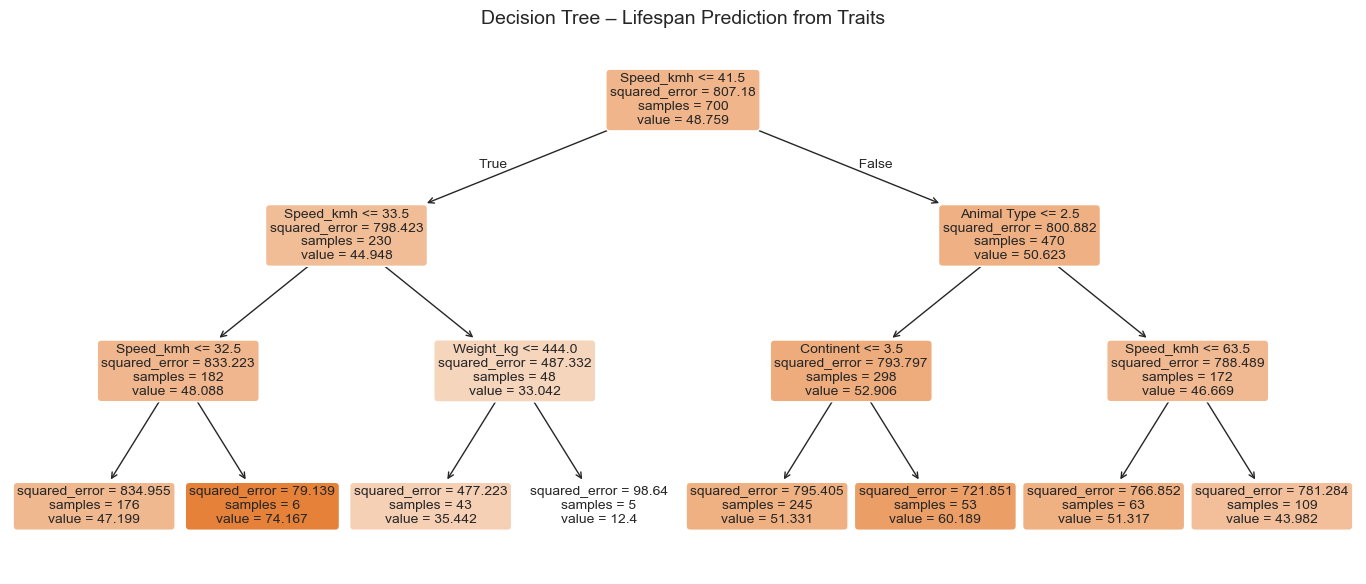

In [1435]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = df_encoded[['Speed_kmh', 'Weight_kg', 'Animal Type', 'Continent', 'Migration', 'Reproduction']]
y = df_encoded['Lifespan']

tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

plt.figure(figsize=(14, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree – Lifespan Prediction from Traits", fontsize=14)
plt.tight_layout()
plt.show()

### Findings
- Factors like high body weight and live reproduction tend to increase predicted lifespan — confirming known biological patterns in mammals and birds.

### Recommendations
- Use lifespan models for estimating ecological stability and planning for species recovery timelines.


- Support long-term habitats for species with longer life spans (e.g., elephants, whales)


#
### 15. Trait-Based Species Clustering: Use K-Means Clustering to group species by ecological similarity for targeted conservation programs.


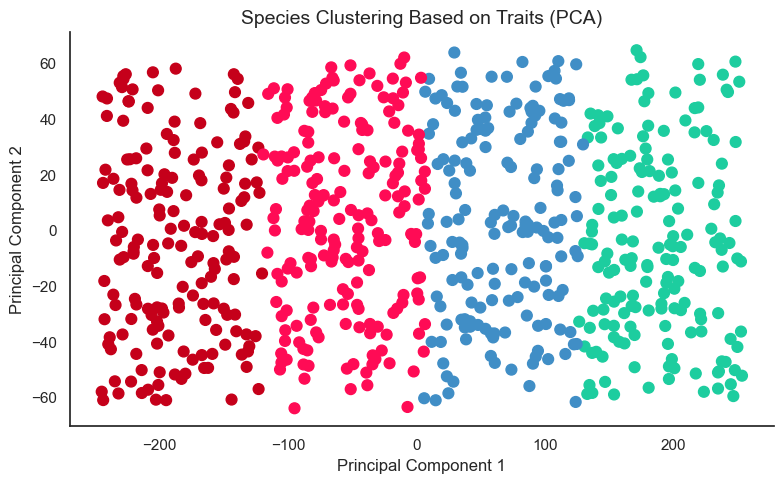

In [1439]:


# Define custom colors
custom_colors = ["#C5001A", "#408EC6", "#1DCD9F", "#FF0B55"]
cmap_custom = ListedColormap(custom_colors)

# Select features and apply KMeans
X_cluster = df_encoded[['Speed_kmh', 'Weight_kg', 'Lifespan', 'Animal Type', 'Migration', 'Reproduction']]
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# Plot PCA scatter with custom colors
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap=cmap_custom, s=60)

plt.title("Species Clustering Based on Traits (PCA)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

### Findings
- Species naturally form ecological clusters — e.g., high-speed, short-lifespan birds vs. slow-moving, long-lived mammals — useful for designing cluster-based protection zones.

### Recommendations
- Assign conservation strategies by cluster type instead of species-by-species.


- Use findings to justify regional sanctuaries for clustered species needs.


#
### 16. Revealing Species Trait Similarities Through K-Means Clustering and Dimensionality Reduction



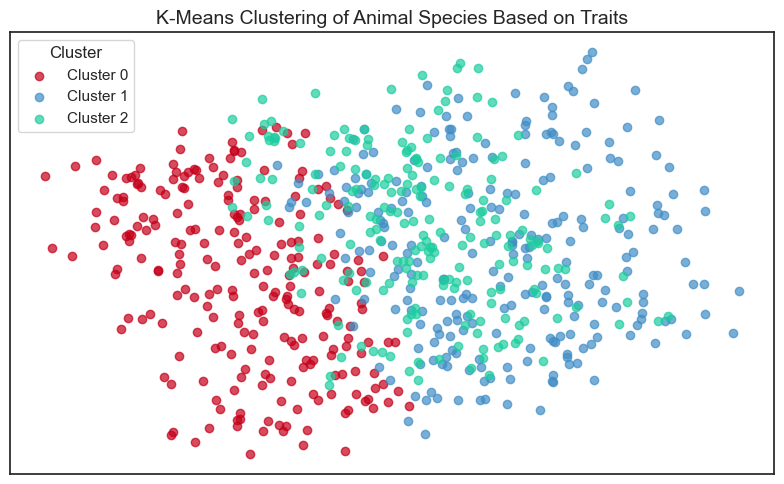

In [1443]:
# Prepare data for clustering
clustering_features = ['Speed_kmh', 'Weight_kg', 'Lifespan']
df_cluster = df_new[clustering_features].dropna()
df_cluster = df_cluster.astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df_cluster['Cluster'] = clusters
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 5))
colors = ["#C5001A", "#408EC6", "#1DCD9F"]
for i in range(3):
    cluster_data = df_cluster[df_cluster['Cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {i}', color=colors[i], alpha=0.7)

plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])
plt.title("K-Means Clustering of Animal Species Based on Traits", fontsize=14)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### Explanation:
- Each point is a species, placed according to a combination of its traits.


- Colors represent the three automatically detected clusters.


- PCA axes are combinations of speed, weight, and lifespan—ideal for visual separation.


Insights:
- Cluster 0 might group lighter, faster animals.


- Cluster 1 could include mid-weight species with balanced speed and lifespan.


- Cluster 2 likely represents heavy or long-living animals, possibly slower.


### Recommendations
- Use these clusters to guide species categorization for conservation planning.


- Consider naming clusters based on biological patterns after further interpretation.


- This clustering can support personalized conservation strategies or habitat planning.


#
### Conclusion
The analysis reveals stark regional and biological disparities in threat levels across animal species. Migratory and heavier species face greater risks due to environmental pressures and fragmented ecosystems. Predictive modeling highlights species vulnerability based on habitat, behavior, and physical traits, giving conservationists a vital edge in proactive decision-making.


#
### Key Achievements:
- Developed 15 strategic, actionable objectives including 5 machine learning applications.


- Visualized threat levels across continents, countries, and animal classifications using compelling custom charts.


- Identified high-risk zones and species categories requiring urgent conservation attention.


- Demonstrated how speed, weight, and migration correlate with ecological vulnerability.


- Built ML models for threat level prediction, offering foresight into species conservation needs.


#
### Challenges
- Limited dataset size may restrict generalization of findings.


- Missing granular data like exact population sizes, poaching levels, or habitat types.


- Categorical variables required careful preprocessing for modeling.

#
### Opportunities
- Dataset serves as a strong educational and prototyping foundation for larger ecological studies.


- Ideal for developing early-warning systems using predictive analytics.


- Encourages cross-border conservation collaboration, especially for migratory species.


#
### Future Projections:
- Expand dataset by incorporating climate data, population trends, and geographic coordinates.


- Collaborate with conservation agencies to validate and apply ML threat prediction in real-world species assessments.


- Introduce real-time dashboards to track at-risk species by region and traits.


- Create policy briefing tools based on continuous model updates and species monitoring.